In [18]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from pathlib import Path
%matplotlib inline
plt.style.use('seaborn')

In [20]:
!ls PriceData/

ls: cannot access 'PriceData/': No such file or directory


# Dataset Creation 

### Loading all the frames in 

In [68]:
DATA = Path('./data')
btc = pd.read_csv(DATA / 'Coinbase_BTCUSD_1h.csv')
eth = pd.read_csv(DATA / 'Coinbase_ETHUSD_1h.csv')
ltc = pd.read_csv(DATA / 'Coinbase_LTCUSD_1h.csv')

In [69]:
eth.head()

,Date,Symbol,Open,High,Low,Close,Volume From,Volume To
0,2018-08-01 11-PM,ETHUSD,420.30,421.09,417.00,418.99,2302.00,964985.85
1,2018-08-01 10-PM,ETHUSD,408.92,421.17,407.78,420.30,5404.38,2243774.77
2,2018-08-01 09-PM,ETHUSD,409.71,412.34,408.88,408.92,5149.88,2114893.08
3,2018-08-01 08-PM,ETHUSD,419.61,419.87,409.00,409.71,5272.25,2183231.17
4,2018-08-01 07-PM,ETHUSD,416.71,419.62,416.70,419.61,1828.92,764960.88


## Creating a simple normalized dataset

In [70]:
# each column is normalized like (x - mean) / stdev
norm = [df.copy() for df in [btc, eth, ltc]]
for idx, df in enumerate([btc, eth, ltc]):
    for column in df.columns:
        values = df[column].values
        if np.issubdtype(values.dtype, np.number):
            mean = np.mean(values)
            stdev = np.std(values)
            norm[idx][column] = (values - mean) / stdev 
            
            

[Text(0,0.5,'Normalized Closing Price'),
 Text(0.5,0,'Hours'),
 Text(0.5,1,'Normalized Prices')]

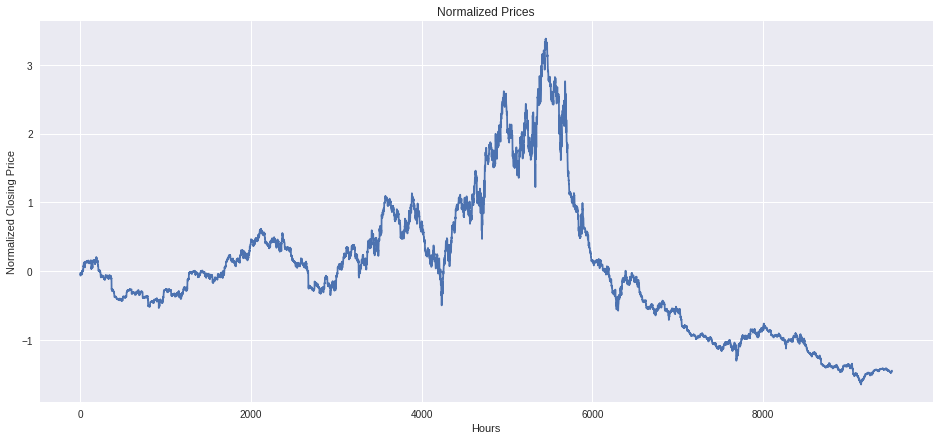

In [71]:
# lets visualise
norm_prices = norm[0]['Close'].values
fig, axes = plt.subplots(figsize=(16,7))
axes.plot(norm_prices)
axes.set(title='Normalized Prices',xlabel='Hours',ylabel='Normalized Closing Price')

In [72]:
norm_dir = DATA / 'NORM'
norm_dir.mkdir(exist_ok=True)

norm[0].to_csv(norm_dir / 'btc_simple_norm.csv')
norm[1].to_csv(norm_dir / 'eth_simple_norm.csv')
norm[2].to_csv(norm_dir / 'ltc_simple_norm.csv')

## Creating a stationary series dataset 

In [73]:
def scaled_log(x):
    return np.log(3+x)

In [74]:
stat_series = [df.copy() for df in [btc, eth, ltc]]
for df in stat_series:
    for column in df.columns:
        if np.issubdtype(df[column].dtype, np.number):
            df[column] = df[column].apply(scaled_log)
            df[column] = df[column].diff()
            

[Text(0,0.5,'Stationary Closing Price'),
 Text(0.5,0,'Hours'),
 Text(0.5,1,'Stationary Series')]

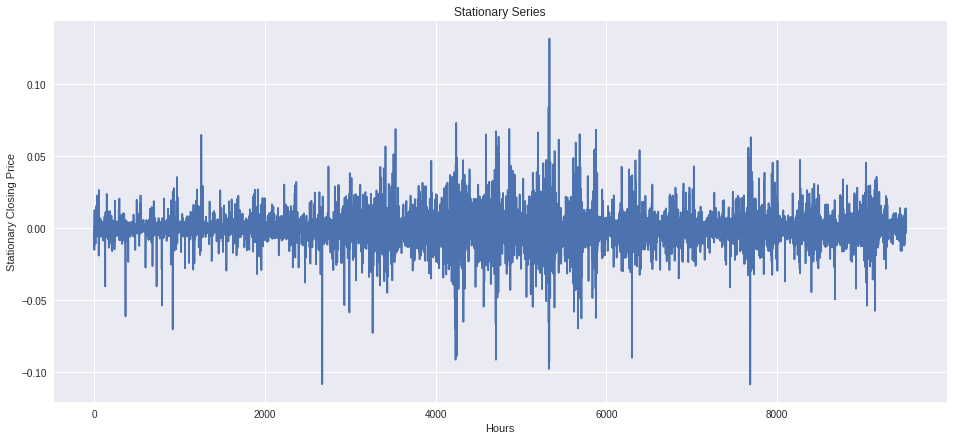

In [75]:
# lets visualize
# lets visualise
stat_prices = stat_series[0]['Close'].values
fig, axes = plt.subplots(figsize=(16,7))
axes.plot(stat_prices)
axes.set(title='Stationary Series', xlabel='Hours', ylabel='Stationary Closing Price')

In [77]:
[len(df) for df in stat_series]

[9512, 9512, 9512]

In [78]:
stat_series[0].isnull().sum()

Date           0
Symbol         0
Open           1
High           1
Low            1
Close          1
Volume From    1
Volume To      1
dtype: int64

In [79]:
stat_series = [df.dropna() for df in stat_series]

In [80]:
stat_series[0].to_csv(norm_dir / 'btc_stat_series.csv')
stat_series[1].to_csv(norm_dir / 'eth_stat_series.csv')
stat_series[2].to_csv(norm_dir / 'ltc_stat_series.csv')

## Lets see what we get when we apply both types 

In [12]:
both = [df.copy() for df in stat_series]
for idx, df in enumerate(both):
    for column in df.columns:
        values = df[column].values
        if np.issubdtype(values.dtype, np.number):
            mean = np.mean(values)
            stdev = np.std(values)
            norm[idx][column] = (values - mean) / stdev 
            

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/_methods.py:102: RuntimeWarning: invalid value encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True)


[Text(0,0.5,'Stationary Closing Price'),
 Text(0.5,0,'Hours'),
 Text(0.5,1,'Stationary Series')]

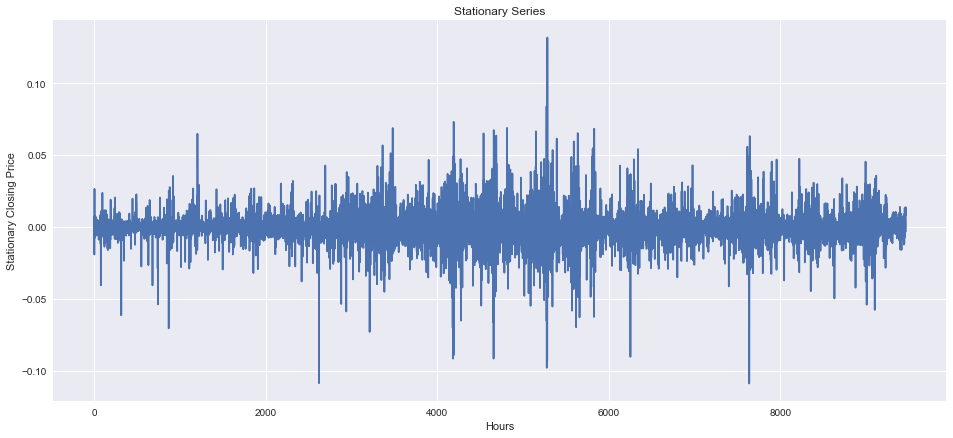

In [13]:
stat_prices = both[0]['Close'].values
fig, axes = plt.subplots(figsize=(16,7))
axes.plot(stat_prices)
axes.set(title='Stationary Series', xlabel='Hours', ylabel='Stationary Closing Price')